<a href="https://colab.research.google.com/github/bianseren/Digital_System_Lab/blob/main/VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [21]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [32]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output [3:0] count,
    output ten
);

//register//
reg [3:0] count_reg;
reg ten_reg;

//assignment//
assign count = count_reg;
assign ten = ten_reg;


always @(posedge clk or posedge rst) begin
  if (rst) begin
    count_reg <= 4'b0000;
    ten_reg <= 0;
  end

  else if (count_reg == 4'b1001 ) begin

      count_reg <= 4'b0000;
      ten_reg <= 1;
  end

  else begin
    count_reg <= count_reg + 4'b0001;

  end

end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0]count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

always #1 clk = ~clk;

initial begin

  $dumpfile("tb.vcd");
  $dumpvars(0, decade_counter_tb);
  clk = 0;
  rst= 1;
  #1 rst = 0;
  #20 $finish;
  $dumpoff;

end

endmodule


VCD info: dumpfile tb.vcd opened for output.



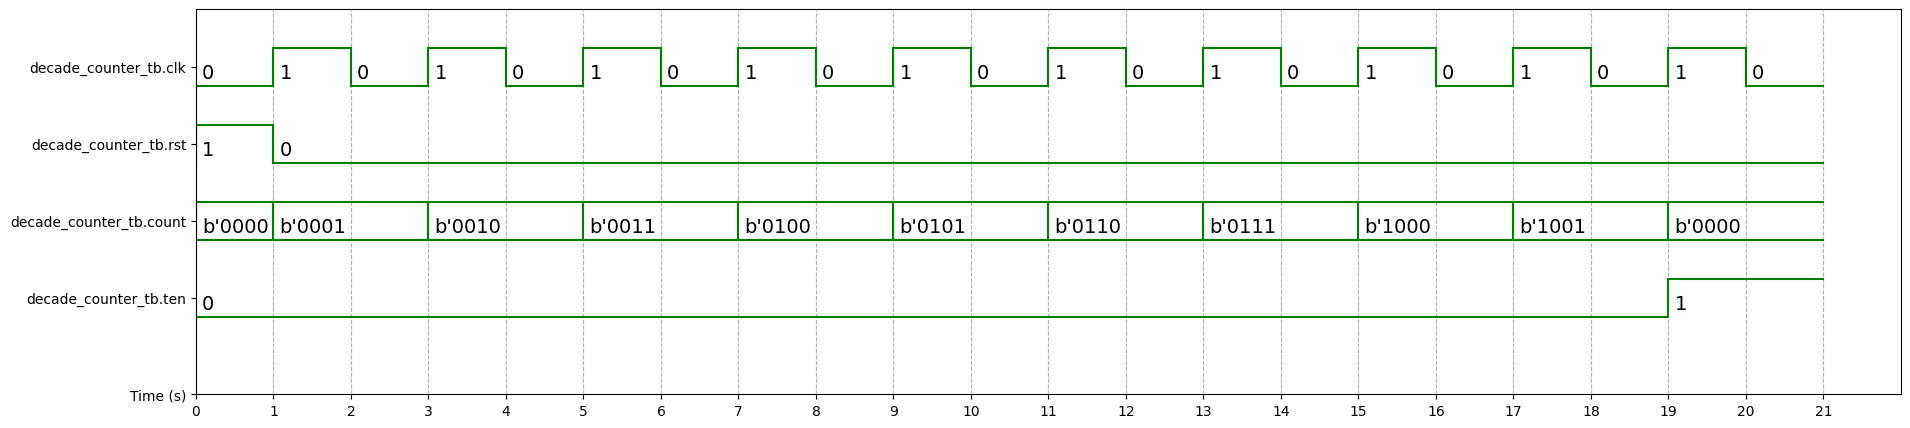

In [34]:
%%waveform tb.vcd

sign_list = ['decade_counter_tb.clk','decade_counter_tb.rst','decade_counter_tb.count','decade_counter_tb.ten']
time_begin = 0
time_end = 21
base = 'bin' # bin, dec, dec2, hex, octal

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

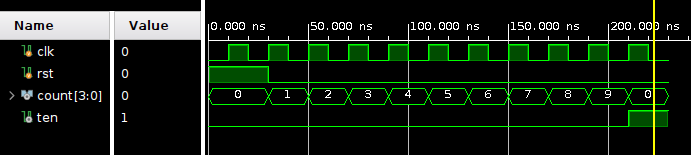

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [48]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);

always @(*) begin
    case (SEL)
        2'b00: X = A;
        2'b01: X = B;
        2'b10: X = C;
        2'b11: X = D;
        default: X = 2'b00;
    endcase
end

endmodule

//TESTBENCH HERE

`timescale 1ns/1ps

module multiplexer_tb;
    reg [1:0] A, B, C, D;
    reg [1:0] SEL;
    wire [1:0] X;

    multiplexer uut (
        .A(A), .B(B), .C(C), .D(D),
        .SEL(SEL), .X(X)
    );

    // Test sequence
    initial begin
        // Enable waveform dumping
        $dumpfile("multiplexer.vcd"); // File to store waveform data
        $dumpvars(0, multiplexer_tb); // Dump all signals in this module

        $monitor("Time = %0t | SEL = %b | X = %b", $time, SEL, X);

        A = 2'b00; B = 2'b01; C = 2'b10; D = 2'b11;

        SEL = 2'b00; #10;
        SEL = 2'b01; #10;
        SEL = 2'b10; #10;
        SEL = 2'b11; #10;

        $finish; // End simulation
    end
endmodule

VCD info: dumpfile multiplexer.vcd opened for output.
Time = 0 | SEL = 00 | X = 00
Time = 10000 | SEL = 01 | X = 01
Time = 20000 | SEL = 10 | X = 10
Time = 30000 | SEL = 11 | X = 11



5. Here is a demo testbench result for the multiplexer;

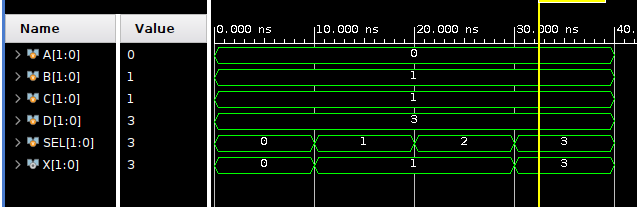

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [55]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg [1:0]W,
    output reg [1:0]X,
    output reg [1:0]Y,
    output reg [1:0]Z
    );

always @(*) begin

    W = 2'b00;
    X = 2'b00;
    Y = 2'b00;
    Z = 2'b00;


    case (SEL)
        2'b00: W = A;
        2'b01: X = A;
        2'b10: Y = A;
        2'b11: Z = A;
        default: begin
            W = 2'b00;
            X = 2'b00;
            Y = 2'b00;
            Z = 2'b00;
        end
    endcase
end

endmodule


`timescale 1ns/1ps

module demultiplexer_tb;
    reg [1:0] A;
    reg [1:0] SEL;
    wire [1:0] W, X, Y, Z;

    demultiplexer uut (
        .A(A), .SEL(SEL),
        .W(W), .X(X), .Y(Y), .Z(Z)
    );

    initial begin
        // Enable waveform dumping
        $dumpfile("demultiplexer.vcd");
        $dumpvars(0, demultiplexer_tb);

        $monitor("Time=%0t | A=%b | SEL=%b | W=%b | X=%b | Y=%b | Z=%b",
                 $time, A, SEL, W, X, Y, Z);

        A = 2'b11; SEL = 2'b00; #10;  // Expect W = A, others 0
        A = 2'b10; SEL = 2'b01; #10;  // Expect X = A, others 0
        A = 2'b01; SEL = 2'b10; #10;  // Expect Y = A, others 0
        A = 2'b00; SEL = 2'b11; #10;  // Expect Z = A, others 0

        $finish;
    end
endmodule



VCD info: dumpfile demultiplexer.vcd opened for output.
Time=0 | A=11 | SEL=00 | W=11 | X=00 | Y=00 | Z=00
Time=10000 | A=10 | SEL=01 | W=00 | X=10 | Y=00 | Z=00
Time=20000 | A=01 | SEL=10 | W=00 | X=00 | Y=01 | Z=00
Time=30000 | A=00 | SEL=11 | W=00 | X=00 | Y=00 | Z=00



5. Here is a demo testbench result for the demultiplexer;

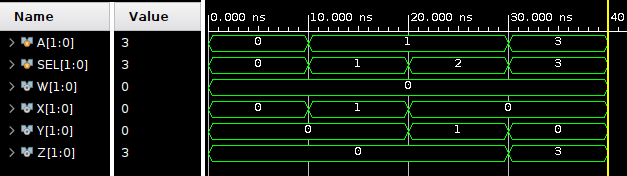

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [58]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output reg [4:0]q
);


always @(*) begin
    case (ctrl)
        1'b0: q = A[3:0] + B[3:0]; // Sum of lower 4 bits
        1'b1: q = A[7:4] + B[7:4]; // Sum of upper 4 bits
        default: q = 5'b00000;
    endcase
end

endmodule

`timescale 1ns/1ps

module nibbleadd_tb;
    reg [7:0] A, B;
    reg ctrl;
    wire [4:0] q;

    // Instantiate the nibbleadd module
    nibbleadd uut (
        .A(A), .B(B), .ctrl(ctrl), .q(q)
    );

    // Test sequence
    initial begin
        // Enable waveform dumping
        $dumpfile("nibbleadd.vcd");
        $dumpvars(0, nibbleadd_tb);

        $monitor("Time=%0t | A=%b | B=%b | ctrl=%b | q=%b",
                 $time, A, B, ctrl, q);

        // Test Cases
        A = 8'b00001111; B = 8'b00000001; ctrl = 0; #10;  // 0+1, expect q = 5'b00010
        A = 8'b11110000; B = 8'b00001111; ctrl = 1; #10;  // 15+0, expect q = 5'b01111
        A = 8'b10101010; B = 8'b01010101; ctrl = 0; #10;  // Lower nibble sum
        A = 8'b10101010; B = 8'b01010101; ctrl = 1; #10;  // Upper nibble sum

        $finish;
    end
endmodule

VCD info: dumpfile nibbleadd.vcd opened for output.
Time=0 | A=00001111 | B=00000001 | ctrl=0 | q=10000
Time=10000 | A=11110000 | B=00001111 | ctrl=1 | q=01111
Time=20000 | A=10101010 | B=01010101 | ctrl=0 | q=01111
Time=30000 | A=10101010 | B=01010101 | ctrl=1 | q=01111



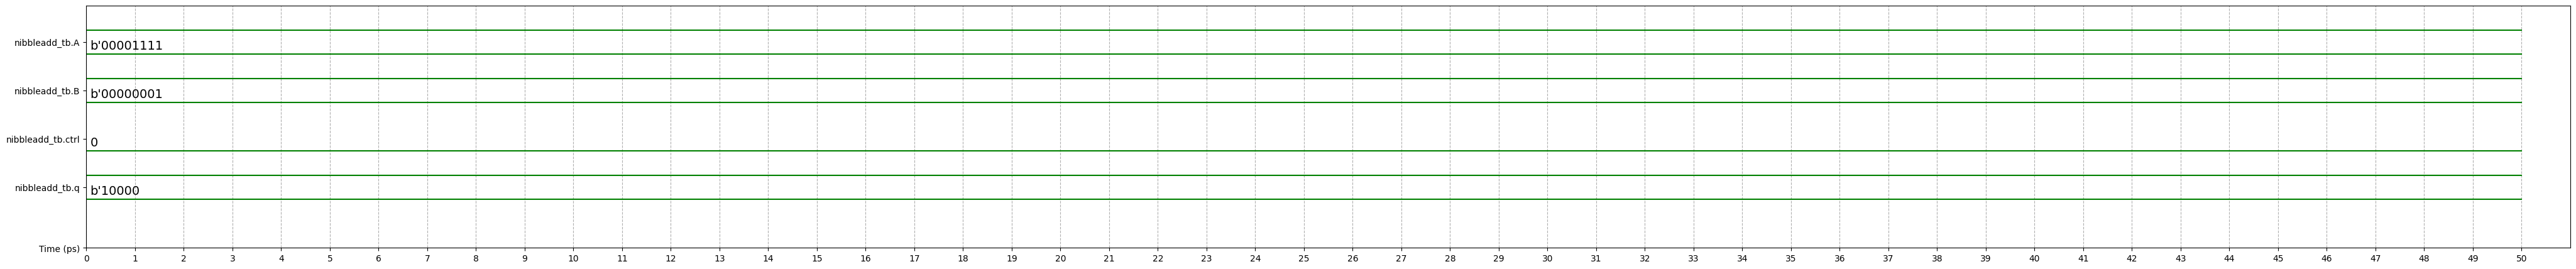

In [61]:
%%waveform nibbleadd.vcd

sign_list = ['nibbleadd_tb.A', 'nibbleadd_tb.B', 'nibbleadd_tb.ctrl', 'nibbleadd_tb.q']
time_begin = 0
time_end = 50
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the nibbleadd;

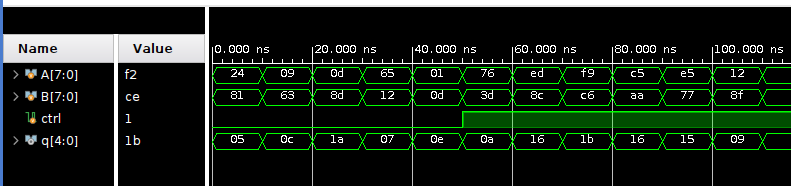

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [67]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

always @(*) begin
    if (rst)
        q = 5'b00000; // Reset condition
    else begin
        case (ctrl)
            1'b0: q = A + B; // When ctrl is 0, output sum of A and B
            1'b1: q = A - C; // When ctrl is 1, output difference of A and C
            default: q = 5'b00000; // Default case for safety
        endcase
    end
end

endmodule

//TESTBENCH

`timescale 1ns / 1ps

module CCTA_tb;

    reg [3:0] A, B, C;
    reg rst, ctrl;
    wire [4:0] q;

    CCTA uut (
        .A(A),
        .B(B),
        .C(C),
        .rst(rst),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin
        A = 4'b0000; B = 4'b0000; C = 4'b0000;
        rst = 1; ctrl = 0;

        #10 rst = 0;

        A = 4'b0101; B = 4'b0011; C = 4'b0000; ctrl = 0;
        #10;

        A = 4'b0110; B = 4'b0000; C = 4'b0010; ctrl = 1;
        #10;

        rst = 1;
        #10 rst = 0;

        A = 4'b1001; B = 4'b0100; C = 4'b0000; ctrl = 0;
        #10;

        A = 4'b1010; B = 4'b0000; C = 4'b0110; ctrl = 1;
        #10;

        $finish;
    end

    initial begin
        $monitor("Time=%0t | A=%b B=%b C=%b | rst=%b ctrl=%b | q=%b",
                  $time, A, B, C, rst, ctrl, q);
    end
    initial begin
    $dumpfile("CCTA_tb.vcd");  // Make sure this name matches in %%waveform
    $dumpvars(0, CCTA_tb);      // Dump all variables from the testbench
end


endmodule


VCD info: dumpfile CCTA_tb.vcd opened for output.
Time=0 | A=0000 B=0000 C=0000 | rst=1 ctrl=0 | q=00000
Time=10000 | A=0101 B=0011 C=0000 | rst=0 ctrl=0 | q=01000
Time=20000 | A=0110 B=0000 C=0010 | rst=0 ctrl=1 | q=00100
Time=30000 | A=0110 B=0000 C=0010 | rst=1 ctrl=1 | q=00000
Time=40000 | A=1001 B=0100 C=0000 | rst=0 ctrl=0 | q=01101
Time=50000 | A=1010 B=0000 C=0110 | rst=0 ctrl=1 | q=00100



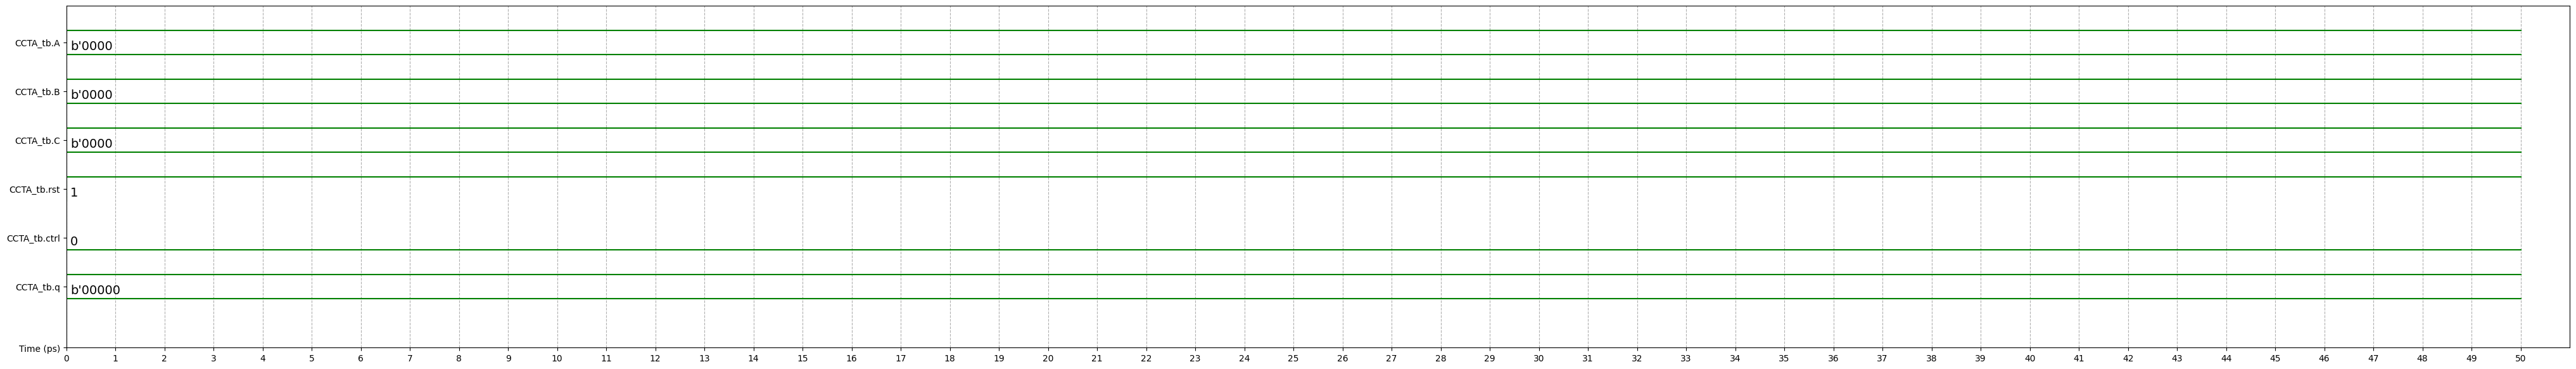

In [68]:
%%waveform CCTA_tb.vcd

sign_list = ['CCTA_tb.A', 'CCTA_tb.B', 'CCTA_tb.C', 'CCTA_tb.rst', 'CCTA_tb.ctrl', 'CCTA_tb.q']
time_begin = 0
time_end = 50
base = 'bin' # bin, dec, dec2, hex, octal


5. Here is a demo testbench result for the CCTA;

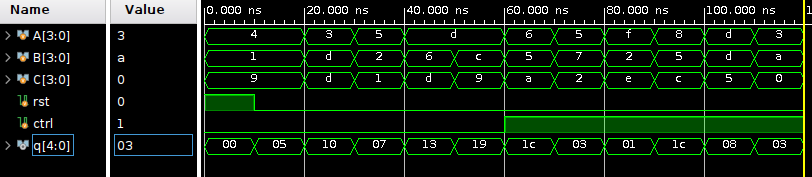